# Data Explorer Team Details

Group Name: Data Explorer

Name: Mohammad Tohin Bapari

Email: tohin@gmx.de

Country: Germany

University: Bergische Universität Wuppertal 

Specialization: Data Science


# Problem Description

Pharmaceutical companies need to understand the persistency of drug usage as per physician prescriptions to improve patient adherence. ABC Pharma aims to automate the process of identifying factors impacting persistency. The goal is to build a classification model to predict whether a patient will be persistent or non-persistent based on various demographic, clinical, and treatment-related factors.


# Github Link

https://github.com/iamtohin/Data-Analytst-Internship-at-Data-Glacier/tree/main/Week%2010

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [5]:
# Load the dataset
file_path = 'Cleaned_Healthcare_Dataset.xlsx'
data = pd.read_excel(file_path,'Dataset')

In [6]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


# Descriptive analysis

In [8]:
# Statistical Summary of Numerical Variables
numerical_summary = data.describe()

In [9]:
# Frequency Counts for Categorical Variables
categorical_columns = ['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx']
categorical_summary = ({col: data[col].value_counts() for col in categorical_columns})

# Descriptive Analysis Results

### Overview of Numerical Variables
       
#### Numerical Summary:

                           > Dexa_Freq_During_Rx and Count_Of_Risks are the numerical variables present in the dataset.

                           > Below are the descriptive statistics for these variables:

In [12]:
display(numerical_summary)

,Dexa_Freq_During_Rx,Count_Of_Risks
count,2850.000000,2850.000000
mean,0.582456,1.191579
std,1.586748,1.041673
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,6.000000,4.000000


#### Frequency Counts for Categorical Variables

##### Persistency Flag:

Non-Persistent: 2034 (71.4%)

Persistent: 816 (28.6%)

#### Gender:

Female: 2681 (94.1%)

Male: 169 (5.9%)

#### Race:

Caucasian: 2611 (91.6%)

African American: 92 (3.2%)

Other/Unknown: 78 (2.7%)

Asian: 69 (2.4%)

#### Ethnicity:

Not Hispanic: 2698 (94.7%)

Hispanic: 77 (2.7%)

Unknown: 75 (2.6%)

#### Region:

Midwest: 1163 (40.8%)

South: 1077 (37.8%)

West: 372 (13.1%)

Northeast: 191 (6.7%)

Other/Unknown: 47 (1.6%)

#### Age Bucket:

75: 1221 (42.8%)

65-75: 881 (30.9%)

55-65: 606 (21.3%)

<55: 142 (5.0%)

#### Ntm Speciality:

General Practitioner: 1306 (45.8%)

Rheumatology: 494 (17.3%)

Endocrinology: 345 (12.1%)

Unknown: 282 (9.9%)

Others: Remaining values

Other Categorical Variables: Similar detailed frequency counts have been generated for each categorical variable.

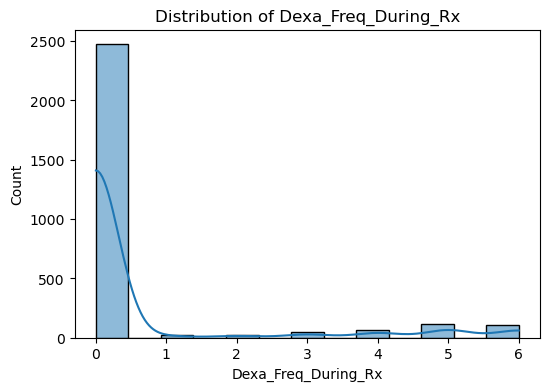

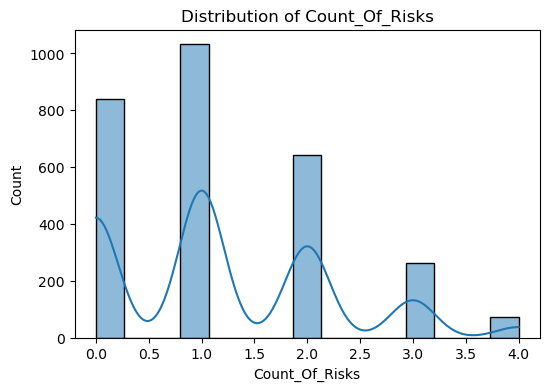

In [14]:
# Histograms for numerical variables
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation Analysis Plan

> Compute the correlation matrix.

> Display the correlation matrix.

> Visualize the correlation matrix using a heatmap.

In [30]:
# Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     Dexa_Freq_During_Rx  Count_Of_Risks
Dexa_Freq_During_Rx             1.000000        0.057757
Count_Of_Risks                  0.057757        1.000000


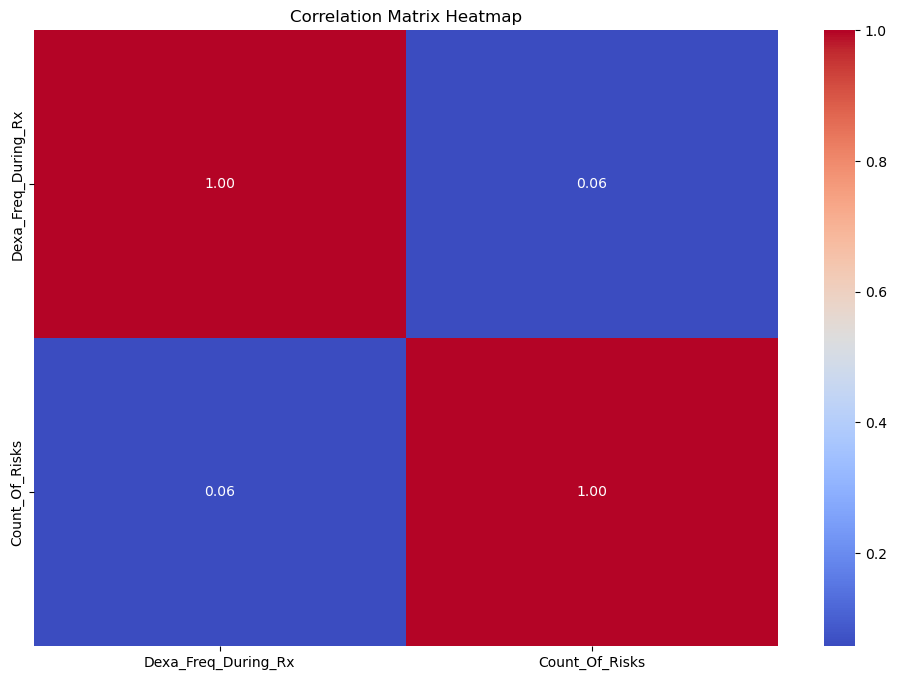

In [32]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Final Recommendation


### 1. Focus on Patient Demographics

Gender Imbalance: The dataset shows a significant gender imbalance with a majority being female (94.1%). It's essential to investigate the underlying reasons for this imbalance and ensure that healthcare services are equally accessible to all genders.

Age Group Targeting: A large proportion of patients are above 75 years old (42.8%). Healthcare providers should prioritize and tailor their services to address the specific needs of the elderly population.

### 2. Addressing Non-Persistent Patients

High Non-Persistence Rate: The dataset reveals that a significant number of patients (71.4%) are non-persistent with their treatments. It is crucial to develop strategies to improve patient adherence to prescribed treatments. This can include patient education, regular follow-ups, and support systems.

### 3. Enhancing Screening and Monitoring

Dexa Frequency: The analysis shows a high frequency of zero values for Dexa_Freq_During_Rx, indicating that many patients did not have Dexa during their treatment. Healthcare providers should consider increasing the frequency of Dexa scans for better monitoring of bone health.
Risk Factor Management: The Count_Of_Risks variable indicates variability in patient risk counts, with a median of 1 and a range from 0 to 4. It's important to have a robust risk management strategy in place to address and mitigate these risks effectively.

### 4. Specialized Care

Ntm Speciality Distribution: The dataset includes a variety of specialities, with a significant number of patients under general practitioners (45.8%). Ensuring that patients with specific needs are referred to appropriate specialists (e.g., rheumatologists, endocrinologists) can improve treatment outcomes.

Specialist Engagement: Increasing the involvement of specialists (currently at 39.3%) could lead to better patient management and adherence to treatment plans.

### 5. Regional Focus

Regional Disparities: The dataset shows variation in patient distribution across regions, with the Midwest and South regions having the highest number of patients. Healthcare policies and resources should be tailored to address the regional disparities and ensure equitable access to healthcare services.

### 6. Continuous Data Monitoring
Data-Driven Decisions: Utilize the insights from the correlation analysis to identify key factors influencing patient health outcomes. Regularly updating and analyzing patient data can help in making informed decisions and improving healthcare delivery.

### Implementation Plan
Patient Education Programs: Implement educational programs to inform patients about the importance of adhering to their treatment plans.

Regular Health Screenings: Increase the frequency of health screenings, particularly Dexa scans, to monitor patient health effectively.

Specialist Referrals: Develop a referral system to ensure patients receive care from appropriate specialists.

Regional Healthcare Initiatives: Launch regional healthcare initiatives to address the specific needs of patients in different areas.

Risk Management Protocols: Establish protocols to identify and manage patient risks promptly.

Data Analytics Integration: Integrate advanced data analytics tools to continuously monitor patient data and derive actionable insights.

By implementing these recommendations, healthcare providers can enhance patient care, improve treatment adherence, and ensure equitable access to healthcare services.